In [1]:
using JuMP, Gurobi, IPG, Plots
const global GRB_ENV = Gurobi.Env()

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2562957
Academic license 2562957 - for non-commercial use only - registered to br___@umontreal.ca


Gurobi.Env(Ptr{Nothing} @0x00000000150f6ef0, false, 0)

In [2]:
n = m = 2

X1 = Model()
@variable(X1, x1, start=10.0)
@constraint(X1, x1 >= 0)

X2 = Model()
@variable(X2, x2, start=10.0)
@constraint(X2, x2 >= 0)

players = [
    Player(X1, QuadraticPayoff(0, [2, 1]), 1),
    Player(X2, QuadraticPayoff(0, [1, 2]), 2)
]

2-element Vector{Player}:
 Player(A JuMP Model
├ solver: none
├ objective_sense: FEASIBILITY_SENSE
├ num_variables: 1
├ num_constraints: 1
│ └ AffExpr in MOI.GreaterThan{Float64}: 1
└ Names registered in the model
  └ :x1, QuadraticPayoff([0.0], [[2.0;;], [1.0;;]]), 1)
 Player(A JuMP Model
├ solver: none
├ objective_sense: FEASIBILITY_SENSE
├ num_variables: 1
├ num_constraints: 1
│ └ AffExpr in MOI.GreaterThan{Float64}: 1
└ Names registered in the model
  └ :x2, QuadraticPayoff([0.0], [[1.0;;], [2.0;;]]), 2)

In [3]:
# TODO: I have no idea why it seems to be creating new gurobi envs at each optimization
Σ, payoff_improvements = IPG.SGM(players, () -> Gurobi.Optimizer(GRB_ENV), max_iter=100);

Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2562957
Academic license 2562957 - for non-commercial use only - registered to br___@umontreal.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2562957
Academic license 2562957 - for non-commercial use only - registered to br___@umontreal.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2562957
Academic license 2562957 - for non-commercial use only - registered to br___@umontreal.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2562957
Academic license 2562957 - for non-commercial use only - registered to br___@umontreal.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2562957
Academic license 2562957 - for non-commercial use only - registered to br___@umontreal.ca
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 2562957
Acad

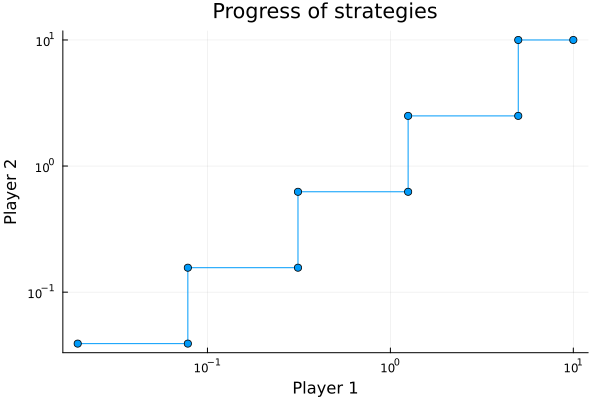

In [4]:
p1_strategies = [σk[1].supp[1][1] for σk in Σ]
p2_strategies = [σk[2].supp[1][1] for σk in Σ]

plot(p1_strategies, p2_strategies, marker=:c, title="Progress of strategies", legend=false)
plot!(xscale=:log10, yscale=:log10)
# xlims!(0,10.2)
# ylims!(0,10.2)
xlabel!("Player 1")
ylabel!("Player 2")

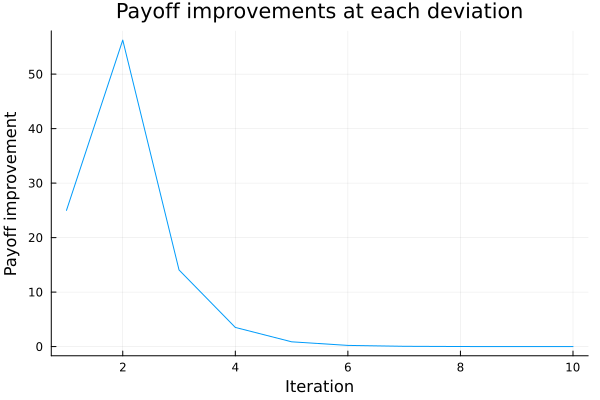

In [5]:
plot(payoff_improvements, title="Payoff improvements at each deviation", legend=false)
ylabel!("Payoff improvement")
xlabel!("Iteration")